# Name: Damilola Olaifa Dada

Term project: CMSC 6950

Student : 202190804

Email: ddolaifa@mun.ca

(1) A Zomato dataset: A restaurant and fastfood dispatch system/service. (Source: https://www.kaggle.com/shrutimehta/zomato-restaurants-data) .

In [31]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
from collections import OrderedDict
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

#  Section 1: Project Description and Preparation

Zomato restaurant and fastfood organization is an organization founded in India, with presence in 15 countries as highlighted on the dataset as of 2017. The information on the dataset covers about 21 variables with attributes represented by these variables. The organization was founded in India in the year 2008.

This project aims at using data analysis to perform various statistical analysis on the dataset. Trend analysis, predictive analysis and other forms of data analytics activities will be explored on this dataset, using phython and pandas as the analytics tools, while seaborn and matplotlib will be used as the virtualization tools. 

In [35]:
#read and display the dataset

zomato_file = pd.read_csv('./zomato.csv')
zomato_file
zomato_file.to_csv('./zomato.csv')
zomato_file.to_hdf('./zomato.h5', key='df', mode='w')

A second data file that has the list of countires is required to be merged with the zomato dataset. The Code below shows the countries on a new dataset ('Country-Code') and the code after shows the countries dataset ('Country-Code') being merged to the main dataset ('zomato'), for better clarity.

In [3]:
#Reading and importing the second dataset from an xlsx datafile
merged_file = pd.read_excel('./Country-Code.xlsx', 'Sheet1')

print('List of countries involved in the survey')
for x in pd.unique(merged_file.Country): print(x)
print()
print('Total number to country', len(pd.unique(merged_file.Country)))

List of countries involved in the survey
India
Australia
Brazil
Canada
Indonesia
New Zealand
Phillipines
Qatar
Singapore
South Africa
Sri Lanka
Turkey
UAE
United Kingdom
United States

Total number to country 15


The information below shows the list of the variables on the dataset and thier data types. 

In [4]:
zomato_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [5]:
# As second dataset shows the list of the countries that zomato has prescence as of the preparation of this dataset.
# The countries data set is being merged with the main dataset to show thier relationships and begin analysis.

#First the dataset is being imported
merged_file = pd.read_excel('./Country-Code.xlsx', 'Sheet1')

# Code below merges the two dataframes as as single by adding the column country at the end of the dataframe for easy readability

merged_file = pd.merge(zomato_file,merged_file,on='Country Code',how='left')
merged_file

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,NamlÛ± Gurme,208,ÛÁstanbul,"Kemankeô Karamustafa Paôa Mahallesi, RÛ±htÛ±...",Karakí_y,"Karakí_y, ÛÁstanbul",28.977392,41.022793,Turkish,...,No,No,No,No,3,4.1,Green,Very Good,788,Turkey
9547,5908749,Ceviz AÛôacÛ±,208,ÛÁstanbul,"Koôuyolu Mahallesi, Muhittin íìstí_ndaÛô Cadd...",Koôuyolu,"Koôuyolu, ÛÁstanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,No,No,No,No,3,4.2,Green,Very Good,1034,Turkey
9548,5915807,Huqqa,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.034640,41.055817,"Italian, World Cuisine",...,No,No,No,No,4,3.7,Yellow,Good,661,Turkey
9549,5916112,Aôôk Kahve,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.036019,41.057979,Restaurant Cafe,...,No,No,No,No,4,4.0,Green,Very Good,901,Turkey


The code below shows the list of countries and the currencies spent in these countries for better analysis.

In [6]:
merged_file.groupby(['Country','Currency']).size().reset_index().drop(0, axis=1)


,Country,Currency
0,Australia,Dollar($)
1,Brazil,Brazilian Real(R$)
2,Canada,Dollar($)
3,India,Indian Rupees(Rs.)
4,Indonesia,Indonesian Rupiah(IDR)
5,New Zealand,NewZealand($)
6,Phillipines,Botswana Pula(P)
7,Qatar,Qatari Rial(QR)
8,Singapore,Dollar($)
9,South Africa,Rand(R)


# Section 2: Trend Analysis and Predicitve Analysis

Ratings is one of the most valuable way an oprganization can use to measure customer satisfaction. With the ratings displayed below, restaurants and fast food chains on the zomato application can ascertain how their customers rate and feel about thier services.

In [7]:
#Rating distribution

rating_data = merged_file.loc[merged_file['Country Code'] == 1].groupby(['Aggregate rating', 'Rating color', 'Rating text']).size().reset_index()
rating_data.rename(columns={0:'Count'}, inplace=True)
rating_data

,Aggregate rating,Rating color,Rating text,Count
0,0.0,White,Not rated,2139
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15
5,2.2,Red,Poor,26
6,2.3,Red,Poor,46
7,2.4,Red,Poor,83
8,2.5,Orange,Average,109
9,2.6,Orange,Average,190


The plot helps to understand the distribution of the aggregate ratings against their count.The colour codes show how each rating is distributed amongst the registered restaurants on the zomato application.

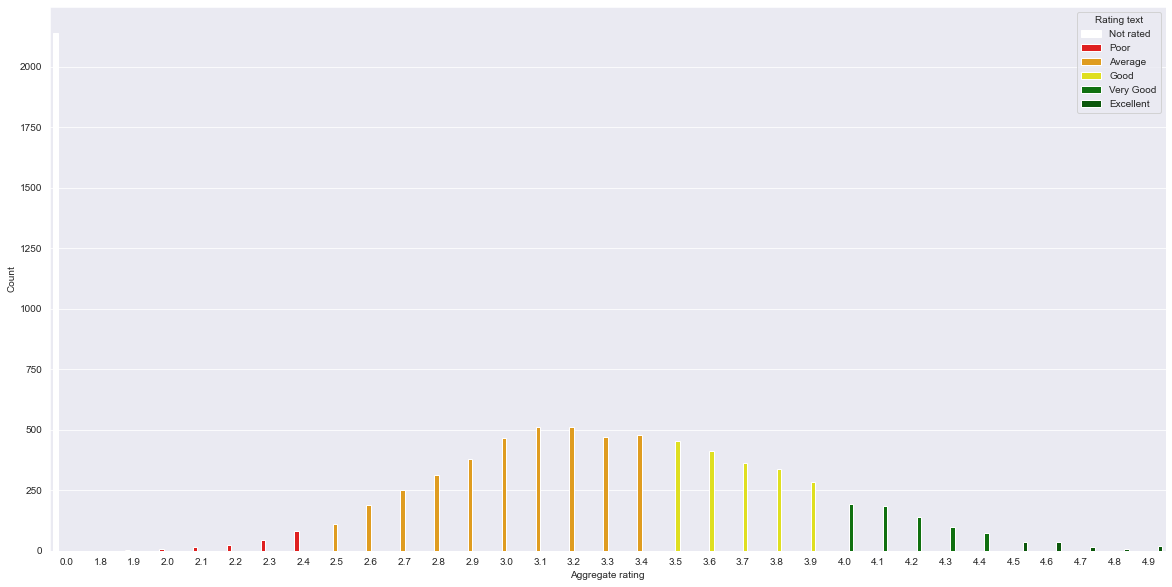

In [15]:
col = ['white', 'red', 'orange', 'yellow', 'green', 'darkgreen']
sns.set_style('darkgrid')
sns.barplot(x='Aggregate rating', y='Count', hue='Rating text', data=rating_data, palette = col)
plt.rcParams['figure.figsize'] = (20, 10)

Let's calculate the mean and standard deviation of the data in order to explain it better. The mean shows the average between the ratings, while the standard deviation shows the variation between the ratings of the restaurants to help understand how they perform.  


In [16]:
#Mean and Standard deviation calculation

mean_rating = rating_data['Aggregate rating'].mean()
std_rating = rating_data['Aggregate rating'].std()
print(mean_rating, std_rating)

3.2484848484848485 1.092051169852291


In [17]:
temp = rating_data[['Rating text', 'Count']].groupby(['Rating text']).sum()
temp.drop('Not rated', axis=0, inplace=True)

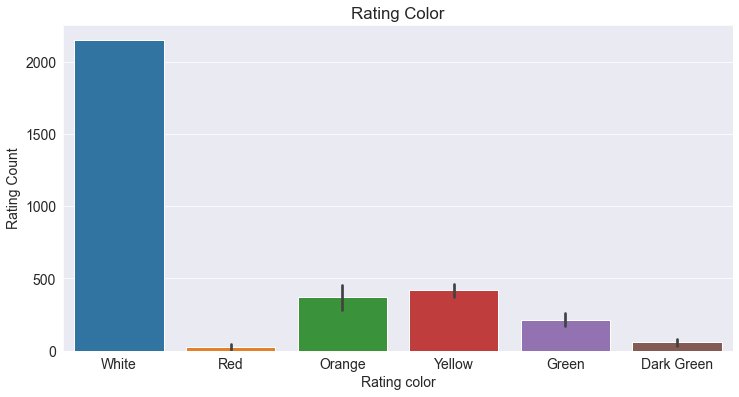

In [18]:
merged_file = pd.read_excel('./Country-Code.xlsx', 'Sheet1')

# Code below merges the two dataframes as as single by adding the column country at the end of the dataframe for easy readability

merged_file = pd.merge(zomato_file,merged_file,on='Country Code',how='left')

#Code below displays a new dataframe 'rating ', which shows how the ratings are identified, graded, and listed.
ratings = merged_file.groupby(['Aggregate rating','Rating color', 'Rating text']).size().reset_index().rename(columns={0:'Rating Count'})

#Code below plots the barchart of the rating count against the identification colour
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

plt.figure(figsize=(12,6))
plt.title('Rating Color')
sns.barplot(x=ratings['Rating color'], y=ratings['Rating Count']);

([<matplotlib.patches.Wedge at 0x1bcad120d30>,
 [Text(-0.22210725228580602, 1.0773431990234354, 'Average'),
  Text(-0.9843943288914495, -0.49088471685962376, 'Excellent'),
  Text(-0.17671439835774694, -1.085712679033021, 'Good'),
  Text(0.8015457124252755, -0.7533422003927948, 'Poor'),
  Text(1.0392877021863498, -0.36039016646437116, 'Very Good')],
 [Text(-0.12114941033771236, 0.5876417449218738, '56.47'),
  Text(-0.5369423612135178, -0.2677553001052493, '1.78'),
  Text(-0.09638967183149831, -0.5922069158361932, '28.36'),
  Text(0.4372067522319684, -0.4109139274869789, '2.76'),
  Text(0.5668842011925544, -0.19657645443511151, '10.62')])

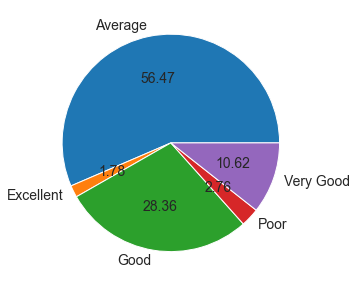

In [19]:
plt.pie(temp['Count'], labels = ['Average', 'Excellent', 'Good', 'Poor', 'Very Good'], autopct='%1.2f')

In [21]:
country_count = merged_file.Country.value_counts()
country_count

India             8652
United States      434
United Kingdom      80
Brazil              60
UAE                 60
South Africa        60
New Zealand         40
Turkey              34
Australia           24
Phillipines         22
Indonesia           21
Singapore           20
Qatar               20
Sri Lanka           20
Canada               4
Name: Country, dtype: int64

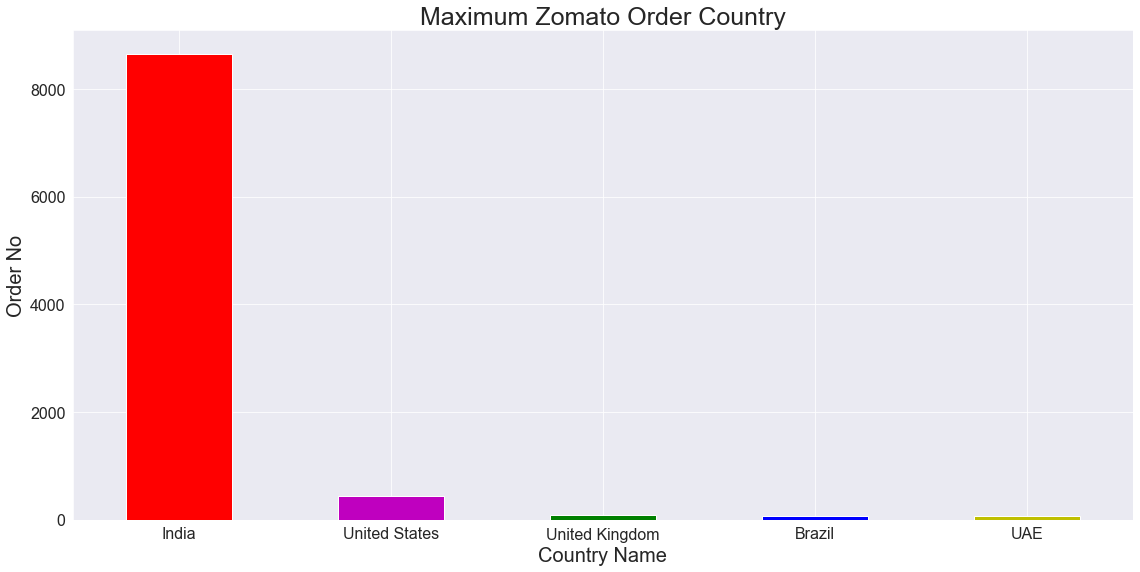

In [32]:
# Top 5 country with highest zomato order - visualization
plt.figure(figsize = (19,9))
country_count[:5].plot(kind = 'bar', color = ['r','m','g','b','y'])
plt.xlabel('Country Name', fontsize = 20)
plt.ylabel('Order No', fontsize = 20)
plt.xticks(rotation = 0, fontsize = 16)
plt.yticks(fontsize = 16)
plt.title('Maximum Zomato Order Country', fontsize = 25)
plt.show()

# Section 3: Strategic and Business Analysis

we can use Data Analysis to check what features are useful to implement in a business to get maximum ratings.
let's start by converting some values into 1 and 0.

<AxesSubplot:ylabel='Country'>

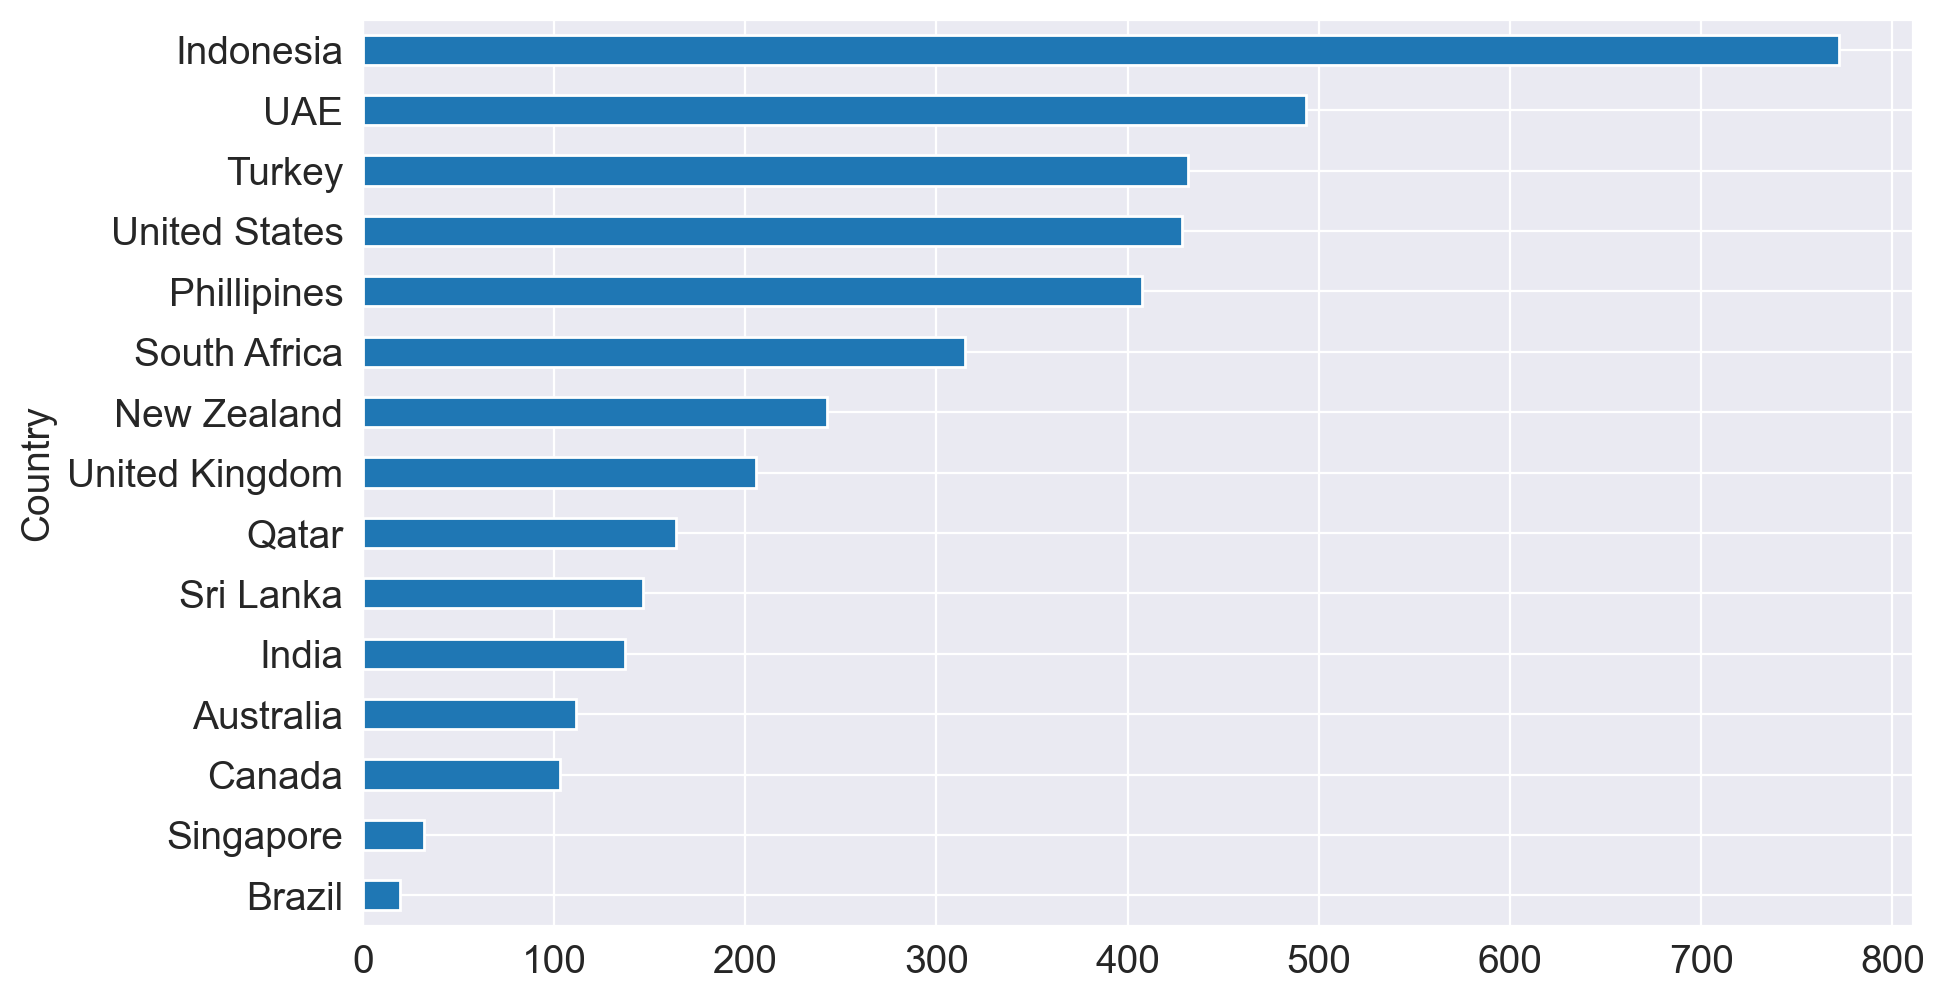

In [23]:
#In this plot, number of votes given to a restauatnt on an average can be known.
#We can observe that the votes given are highest for Asian countries(4 out of 5 are Asian) 

%config InlineBackend.figure_format = 'retina'
restaurant_voting=merged_file.groupby(['Country']).mean()
plt.figure(figsize=(8,5),frameon=True,dpi=100)
restaurant_voting['Votes'].sort_values().plot(kind='barh',figsize=(10,6))
    


([<matplotlib.patches.Wedge at 0x1bcb047dc10>,
 [Text(-0.6145352824185932, 0.9123301960708633, 'New Delhi'),
  Text(0.0623675251198054, -1.0982305276263407, 'Gurgaon'),
  Text(0.8789045225625368, -0.6614581167535246, 'Noida'),
  Text(1.0922218418223437, -0.13058119407559224, 'Faridabad'),
  Text(1.099946280005612, -0.010871113182029924, 'Ghaziabad')],
 [Text(-0.3352010631374145, 0.497634652402289, '68.87%'),
  Text(0.0340186500653484, -0.5990348332507311, '14.07%'),
  Text(0.47940246685229276, -0.36079533641101336, '13.59%'),
  Text(0.5957573682667329, -0.07122610585941394, '3.16%'),
  Text(0.5999706981848791, -0.005929698099289049, '0.31%')])

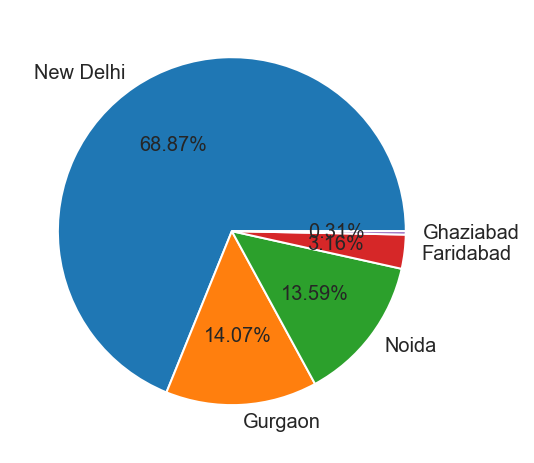

In [37]:
#pie chart for cities distribution - displaying the top 5 cities

city_val = merged_file.City.value_counts()
city_label = merged_file.City.value_counts().index

plt.pie(x = city_val[:5],labels = city_label[:5],autopct='%1.2f%%')

([<matplotlib.patches.Wedge at 0x1bcb0570df0>,
 [Text(0.7383739846958008, 0.8153550507137645, 'North Indian'),
  Text(-0.5794679314239953, 0.9349956772366362, 'North Indian, Chinese'),
  Text(-1.067309479615702, 0.26617752482593154, 'Chinese'),
  Text(-1.0185984499802057, -0.4152796620326146, 'Fast Food'),
  Text(-0.5935788454809928, -0.9261015895664211, 'North Indian, Mughlai'),
  Text(-0.005887079599915552, -1.0999842463843672, 'Cafe'),
  Text(0.4842062514572988, -0.9876964645323336, 'Bakery'),
  Text(0.808736477166136, -0.7456174022251013, 'North Indian, Mughlai, Chinese'),
  Text(1.0055375294202338, -0.44597564611473206, 'Bakery, Desserts'),
  Text(1.090298995560443, -0.14576728123927227, 'Street Food')],
 [Text(0.4027494461977095, 0.4447391185711442, '26.58%'),
  Text(-0.316073417140361, 0.5099976421290743, '14.51%'),
  Text(-0.5821688070631101, 0.14518774081414446, '10.05%'),
  Text(-0.5555991545346576, -0.22651617929051704, '10.05%'),
  Text(-0.32377027935326874, -0.505146321581

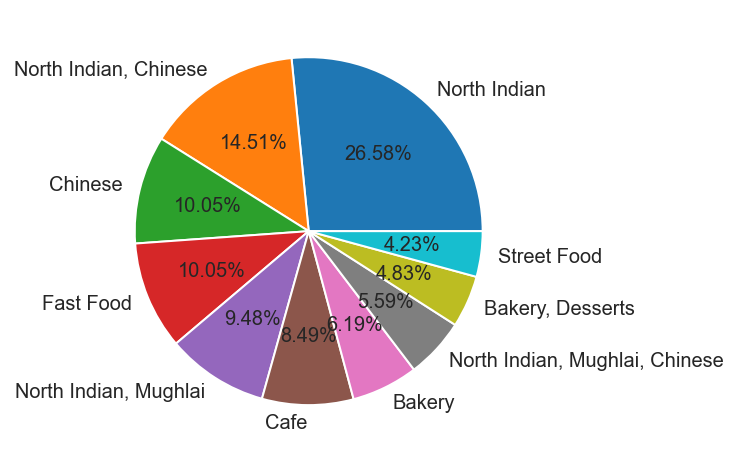

In [38]:
#pie chart to display the top 10 cuisines

cuisine_val = merged_file.Cuisines.value_counts()              #values
cuisine_label = merged_file.Cuisines.value_counts().index      #labels

plt.pie(x = cuisine_val[:10],labels = cuisine_label[:10],autopct='%1.2f%%')

# Section 4: Data Scaling

In [41]:
#Application of selection to get the quantile range of attributes that would be used for masking 
IQ1 = merged_file['Votes'].quantile(0.05)
IQ2 = merged_file['Votes'].quantile(0.95)
FQ1 = merged_file['Aggregate rating'].quantile(0.05)
FQ2 = merged_file['Aggregate rating'].quantile (0.95)

#Application of masks on the selected attributes
country_outliers = merged_file[(merged_file['Votes'] > IQ1) & (merged_file['Votes'] < IQ2)]
country_outliers = country_outliers[(country_outliers['Aggregate rating'] > FQ1) & (country_outliers['Aggregate rating'] < FQ2)]
country_outliers

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
6,6300781,Buffet 101,162,Pasay City,"Building K, SM By The Bay, Sunset Boulevard, M...","SM by the Bay, Mall of Asia Complex, Pasay City","SM by the Bay, Mall of Asia Complex, Pasay Cit...",120.979667,14.531333,"Asian, European",...,Yes,No,No,No,4,4.0,Green,Very Good,520,Phillipines
7,6301290,Vikings,162,Pasay City,"Building B, By The Bay, Seaside Boulevard, Mal...","SM by the Bay, Mall of Asia Complex, Pasay City","SM by the Bay, Mall of Asia Complex, Pasay Cit...",120.979333,14.540000,"Seafood, Filipino, Asian, European",...,Yes,No,No,No,4,4.2,Green,Very Good,677,Phillipines
11,6309455,Mad Mark's Creamery & Good Eats,162,Pasig City,"23 East Capitol Drive, Kapitolyo, Pasig City",Kapitolyo,"Kapitolyo, Pasig City",121.060820,14.570849,"American, Ice Cream, Desserts",...,Yes,No,No,No,3,4.2,Green,Very Good,488,Phillipines
13,6310470,Guevarra's,162,San Juan City,"387 P. Guevarra Corner Argonne Street, Additio...",Addition Hills,"Addition Hills, San Juan City",121.033592,14.593450,Filipino,...,Yes,No,No,No,3,4.2,Green,Very Good,458,Phillipines
15,18185059,Cafe Arabelle,162,Santa Rosa,"Ayala Mall, Solenad, Nuvali, Santa Rosa - Taga...","Nuvali, Don Jose, Santa Rosa","Nuvali, Don Jose, Santa Rosa, Santa Rosa",121.057040,14.237082,"Cafe, American, Italian, Filipino",...,No,No,No,No,3,3.6,Yellow,Good,29,Phillipines
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9532,6002025,MasabaôÛ±,208,Ankara,"Kocatepe Mahallesi, Mithatpaôa Caddesi, No 62...",KÛ±zÛ±lay,"KÛ±zÛ±lay, Ankara",32.859867,39.919144,"Kebab, Turkish Pizza",...,No,No,No,No,3,4.2,Green,Very Good,103,Turkey
9535,6000921,Dí_veroÛôlu,208,Ankara,"íìmitkí_y Mahallesi, 2432. Cadde (8. Cadde), N...",íìmitkí_y,"íìmitkí_y, Ankara",32.701775,39.891564,"Kebab, Desserts, Turkish Pizza",...,No,No,No,No,3,4.2,Green,Very Good,152,Turkey
9542,5926979,Leman Kí_ltí_r,208,ÛÁstanbul,"CaferaÛôa Mahallesi, Neôet í_mer Sokak, No 9/...",KadÛ±kí_y Merkez,"KadÛ±kí_y Merkez, ÛÁstanbul",29.022805,40.989705,Restaurant Cafe,...,No,No,No,No,3,3.7,Yellow,Good,506,Turkey
9548,5915807,Huqqa,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.034640,41.055817,"Italian, World Cuisine",...,No,No,No,No,4,3.7,Yellow,Good,661,Turkey


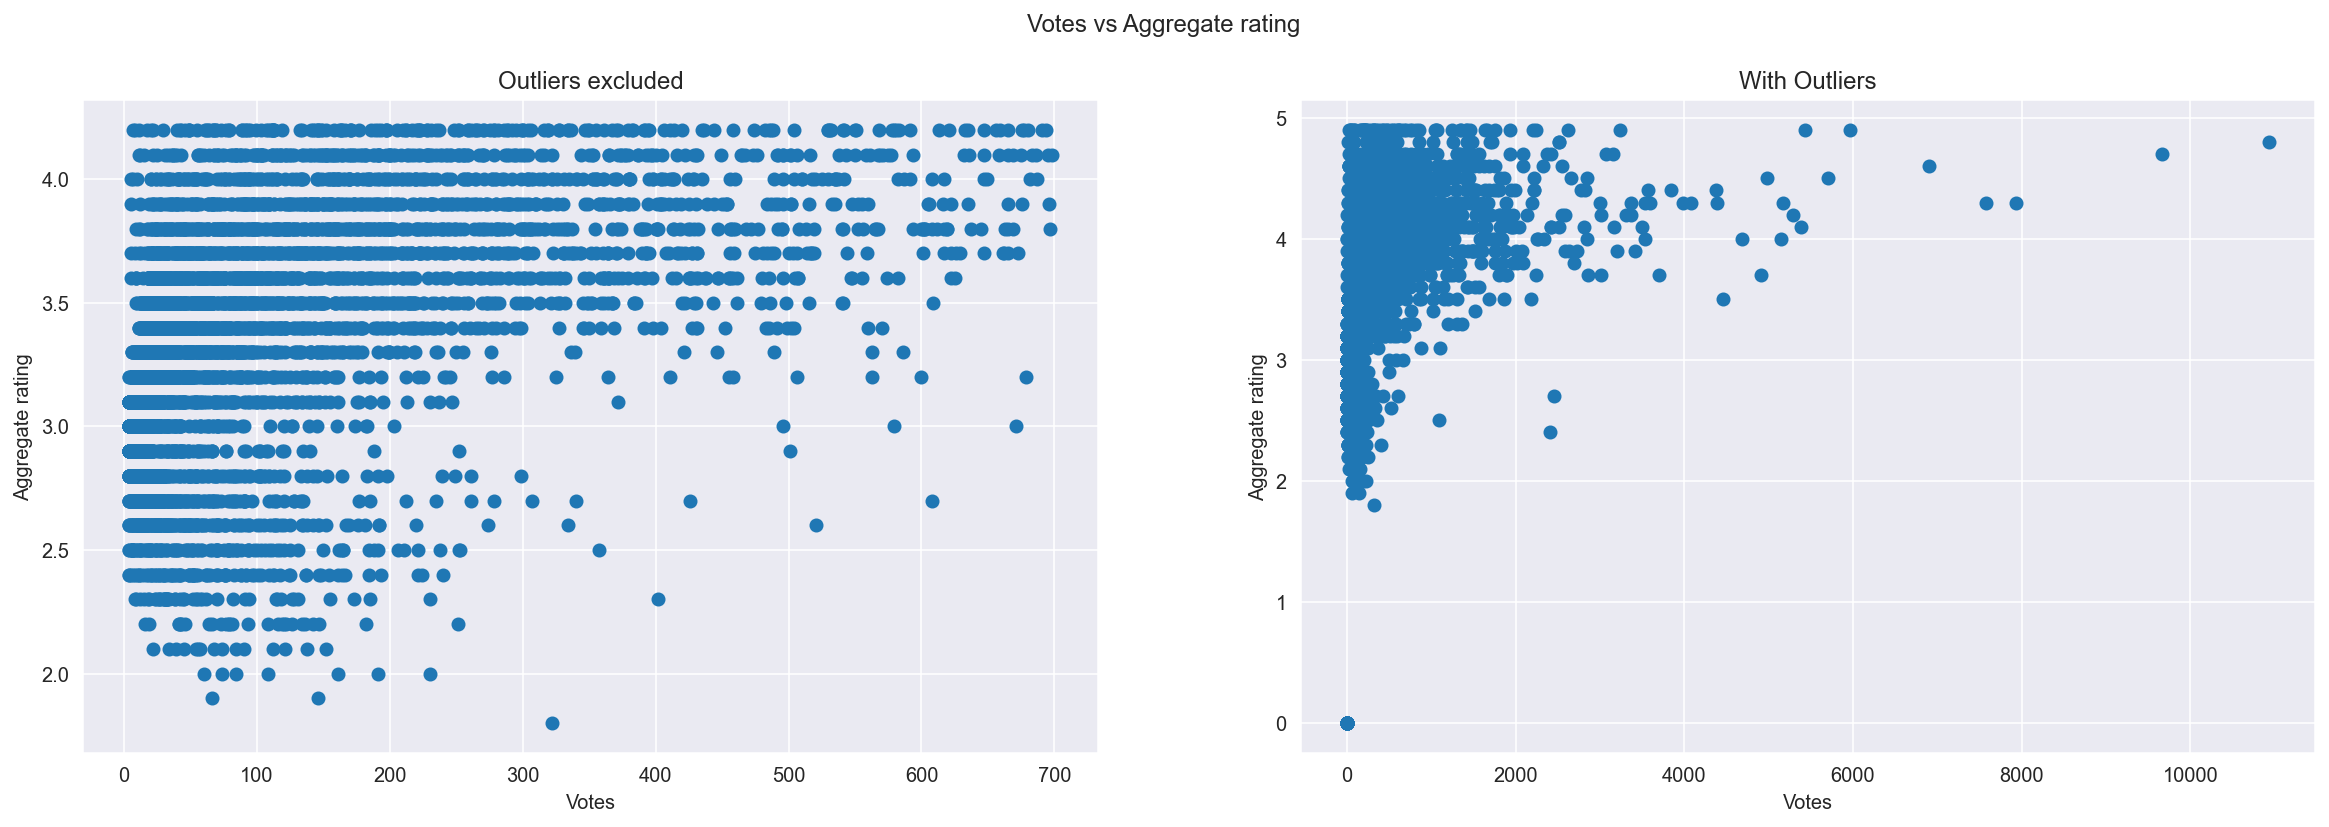

In [42]:
#Code base to display how the outliers are plotted on a scattered plot

fig, axs = plt.subplots (1, 2, figsize = (20, 6))
axs.flatten()
fig.suptitle ('Votes vs Aggregate rating')

axs[0].set_title('Outliers excluded')
axs[1].set_title('With Outliers')

axs[0].set(xlabel = 'Votes', ylabel = 'Aggregate rating')
axs[1].set(xlabel = 'Votes', ylabel = 'Aggregate rating')

XxX = country_outliers['Votes']
XxY = country_outliers['Aggregate rating']

YxX = merged_file['Votes']
YxY = merged_file['Aggregate rating']

axs[0].scatter(XxX,XxY)
axs[1].scatter(YxX,YxY)
plt.show()

In [43]:

zomato = pd.read_csv('./zomato.csv')
zomato

# Drop columns that are irrelevant for scaling and are with NaN since some scaling methods do not accept them as input
zomato_edit = zomato.drop(columns=['Restaurant Name', 'City','Address', 'Locality', 'Locality Verbose', 'Cuisines', 'Currency', 'Has Table booking', 'Has Online delivery', 'Is delivering now', 'Switch to order menu', 'Rating color', 'Rating text',])
zomato_edit

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
0,0,0,0,6317637,162,121.027535,14.565443,1100,3,4.8,314
1,1,1,1,6304287,162,121.014101,14.553708,1200,3,4.5,591
2,2,2,2,6300002,162,121.056831,14.581404,4000,4,4.4,270
3,3,3,3,6318506,162,121.056475,14.585318,1500,4,4.9,365
4,4,4,4,6314302,162,121.057508,14.584450,1500,4,4.8,229
...,...,...,...,...,...,...,...,...,...,...,...
9546,9546,9546,9546,5915730,208,28.977392,41.022793,80,3,4.1,788
9547,9547,9547,9547,5908749,208,29.041297,41.009847,105,3,4.2,1034
9548,9548,9548,9548,5915807,208,29.034640,41.055817,170,4,3.7,661
9549,9549,9549,9549,5916112,208,29.036019,41.057979,120,4,4.0,901


In [44]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.datasets import make_blobs
from sklearn.preprocessing import OneHotEncoder

#Encoding the dataset to show the Column Price range being coverted into a continuous attribute 
#by generating a new column called zomato_new

le = LabelEncoder() 
zomato_edit = zomato_edit.copy()
zomato_edit['Price range'] = le.fit_transform(zomato_edit['Price range'])
zomato_edit

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
0,0,0,0,6317637,162,121.027535,14.565443,1100,2,4.8,314
1,1,1,1,6304287,162,121.014101,14.553708,1200,2,4.5,591
2,2,2,2,6300002,162,121.056831,14.581404,4000,3,4.4,270
3,3,3,3,6318506,162,121.056475,14.585318,1500,3,4.9,365
4,4,4,4,6314302,162,121.057508,14.584450,1500,3,4.8,229
...,...,...,...,...,...,...,...,...,...,...,...
9546,9546,9546,9546,5915730,208,28.977392,41.022793,80,2,4.1,788
9547,9547,9547,9547,5908749,208,29.041297,41.009847,105,2,4.2,1034
9548,9548,9548,9548,5915807,208,29.034640,41.055817,170,3,3.7,661
9549,9549,9549,9549,5916112,208,29.036019,41.057979,120,3,4.0,901


In [45]:
#splitting the dataset
#using train_test_split for dataset splitting of testing and trainning data frames

training_data, testing_data = train_test_split(zomato_edit, train_size=0.8, test_size=0.2, random_state=25)

#execution of the train_test_split model to display the allocated number of rows allocated to test and train

print(f"No. of training examples: {training_data.shape[0]}")
print(f"No. of testing examples: {testing_data.shape[0]}")

No. of training examples: 7640
No. of testing examples: 1911


In [46]:
from sklearn.model_selection import cross_val_score

X = zomato_edit.drop(['Price range'], axis=1).to_numpy()
y = zomato_edit['Price range'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

scaler = MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)


#Model creation and evalaution processes
model = SGDClassifier()
accuracy_scores = cross_val_score(model, X_train, y_train, scoring = 'accuracy', n_jobs = -1)
f1_scores = cross_val_score(model, X_train, y_train, scoring = 'f1_weighted', n_jobs = -1)

#Model performance reporting and execusion 
print(np.mean(accuracy_scores))
print(np.mean(f1_scores))

0.5172774869109948
0.4038167624441571


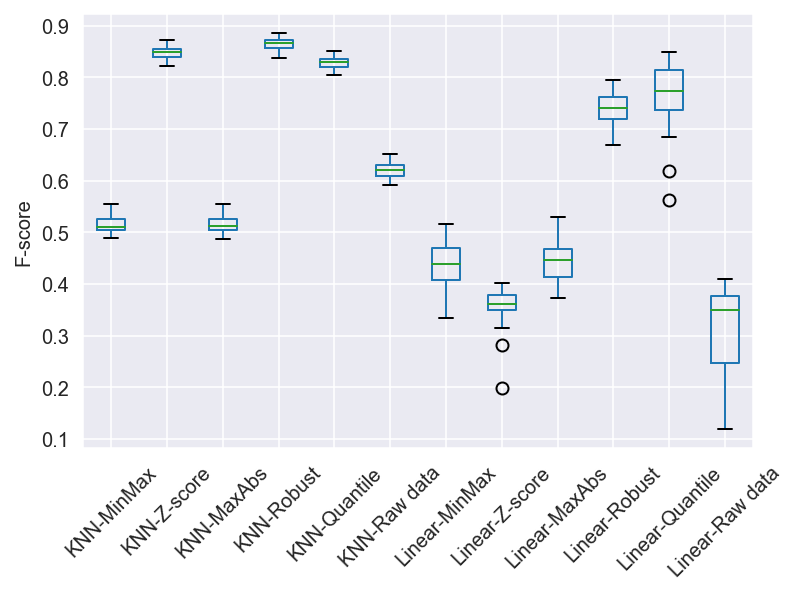

In [47]:
from sklearn.model_selection import RepeatedKFold


#data scalling techniques that would be used to apply scaling on the data classification models
scaler_names = ['MinMax', 'Z-score', 'MaxAbs', 'Robust', 'Quantile']
arr_scalers = [MinMaxScaler(), Normalizer(), MaxAbsScaler(), RobustScaler(), QuantileTransformer(n_quantiles=10, random_state=0, output_distribution='normal')]
results = {}


#KNN model for data classification and clustering
model = KNeighborsClassifier(n_neighbors=3)

for i in range (len(arr_scalers)):
    # X is all the other variables
    X = zomato_edit.drop(['Price range'], axis=1).to_numpy()
    # Let's tranform X     
    X_t = arr_scalers[i].fit_transform(X)
    # y is Sex column that we want to forecast
    y = zomato_edit['Price range'].to_numpy()
    # repeated crossvalidation to filter out a more accurate data frame cluster 
    cv = RepeatedKFold(n_splits=10, n_repeats=5, random_state=1)
    scores = cross_val_score(model, X_t, y, scoring='f1_weighted', cv=cv, n_jobs=-1)
    results['KNN-'+scaler_names[i]] = scores

# Model creation from the test and train clusters data just to put the models side-by-side
X = zomato_edit.drop(['Price range'], axis=1).to_numpy()
y = zomato_edit['Price range'].to_numpy()
cv = RepeatedKFold(n_splits=10, n_repeats=5, random_state=1)
scores = cross_val_score(model, X, y, scoring='f1_weighted', cv=cv, n_jobs=-1)
results['KNN-'+'Raw data'] = scores


#Linear model 
model = SGDClassifier(penalty="l2", max_iter=1000)

for i in range (len(arr_scalers)):
    # X is all the other variables
    X = zomato_edit.drop(['Price range'], axis=1).to_numpy()
    # Let's tranform X     
    X_t = arr_scalers[i].fit_transform(X)
    # y is Sex column that we want to forecast
    y = zomato_edit['Price range'].to_numpy()
    # Let's estimate the values for several rounds of crossvalidation
    cv = RepeatedKFold(n_splits=10, n_repeats=5, random_state=1)
    scores = cross_val_score(model, X_t, y, scoring='f1_weighted', cv=cv, n_jobs=-1)
    results['Linear-'+scaler_names[i]] = scores

# Now let's create the model with the raw data just to put the models side-by-side
X = zomato_edit.drop(['Price range'], axis=1).to_numpy()
y = zomato_edit['Price range'].to_numpy()
cv = RepeatedKFold(n_splits=10, n_repeats=5, random_state=1)
scores = cross_val_score(model, X, y, scoring='f1_weighted', cv=cv, n_jobs=-1)
results['Linear-'+'Raw data'] = scores


# Boxplot creation which shows how the classifiers are plotted against several data scalling techniques
df_zomato_selected = pd.DataFrame(results)
boxplot = df_zomato_selected.boxplot() 
boxplot.set_ylabel('F-score')
boxplot.set_xticklabels(results.keys(), rotation=45)
plt.show()

# Scaling technique implored (Data Descretization Technique)

Data discretization technique is used for scaling the zomato dataset. Data Discretization helps convert huge data into smaller ones, which make the evaluation of these data more manageable and easy to analyse. It also helps to reduce the errors present in the dataset.

Only one data discretization technique is compatible for the zomato dataset. This is the Equal-width scaler technique, first the dataset is being encoded to make attribute continuous, which separates them into specific number of bins. Then the Equal-width technique is applied where the difference of the maximum and minimum value is being divided by the number of bins. This gives a value that when plotted gives easy scaling for data analysis.

Equal-frequency data descretization technique was also applied on the dataset for scaling, but was not comaptible because of incompatible float values in the dataset. so therefore it wasnt compatible with this data scaling.

The plot below also shows a density shift after the equal width scaler technique was applied on the attributes.Their ranges as well as thier grades showed significant changes, which makes it more readable during analysis.

In [52]:
from sklearn.preprocessing import KBinsDiscretizer

discretizer = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')
X_t = discretizer.fit_transform(zomato_edit)
zomato_new_d_ew = pd.DataFrame(X_t, index=zomato_edit.index, columns=zomato_edit.columns)
zomato_new_d_ew

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
0,0.0,0.0,0.0,1.0,3.0,4.0,2.0,0.0,3.0,4.0,0.0
1,0.0,0.0,0.0,1.0,3.0,4.0,2.0,0.0,3.0,4.0,0.0
2,0.0,0.0,0.0,1.0,3.0,4.0,2.0,0.0,4.0,4.0,0.0
3,0.0,0.0,0.0,1.0,3.0,4.0,2.0,0.0,4.0,4.0,0.0
4,0.0,0.0,0.0,1.0,3.0,4.0,2.0,0.0,4.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
9546,4.0,4.0,4.0,1.0,4.0,2.0,4.0,0.0,3.0,4.0,0.0
9547,4.0,4.0,4.0,1.0,4.0,2.0,4.0,0.0,3.0,4.0,0.0
9548,4.0,4.0,4.0,1.0,4.0,2.0,4.0,0.0,4.0,3.0,0.0
9549,4.0,4.0,4.0,1.0,4.0,2.0,4.0,0.0,4.0,4.0,0.0


# Equal Width Scaler

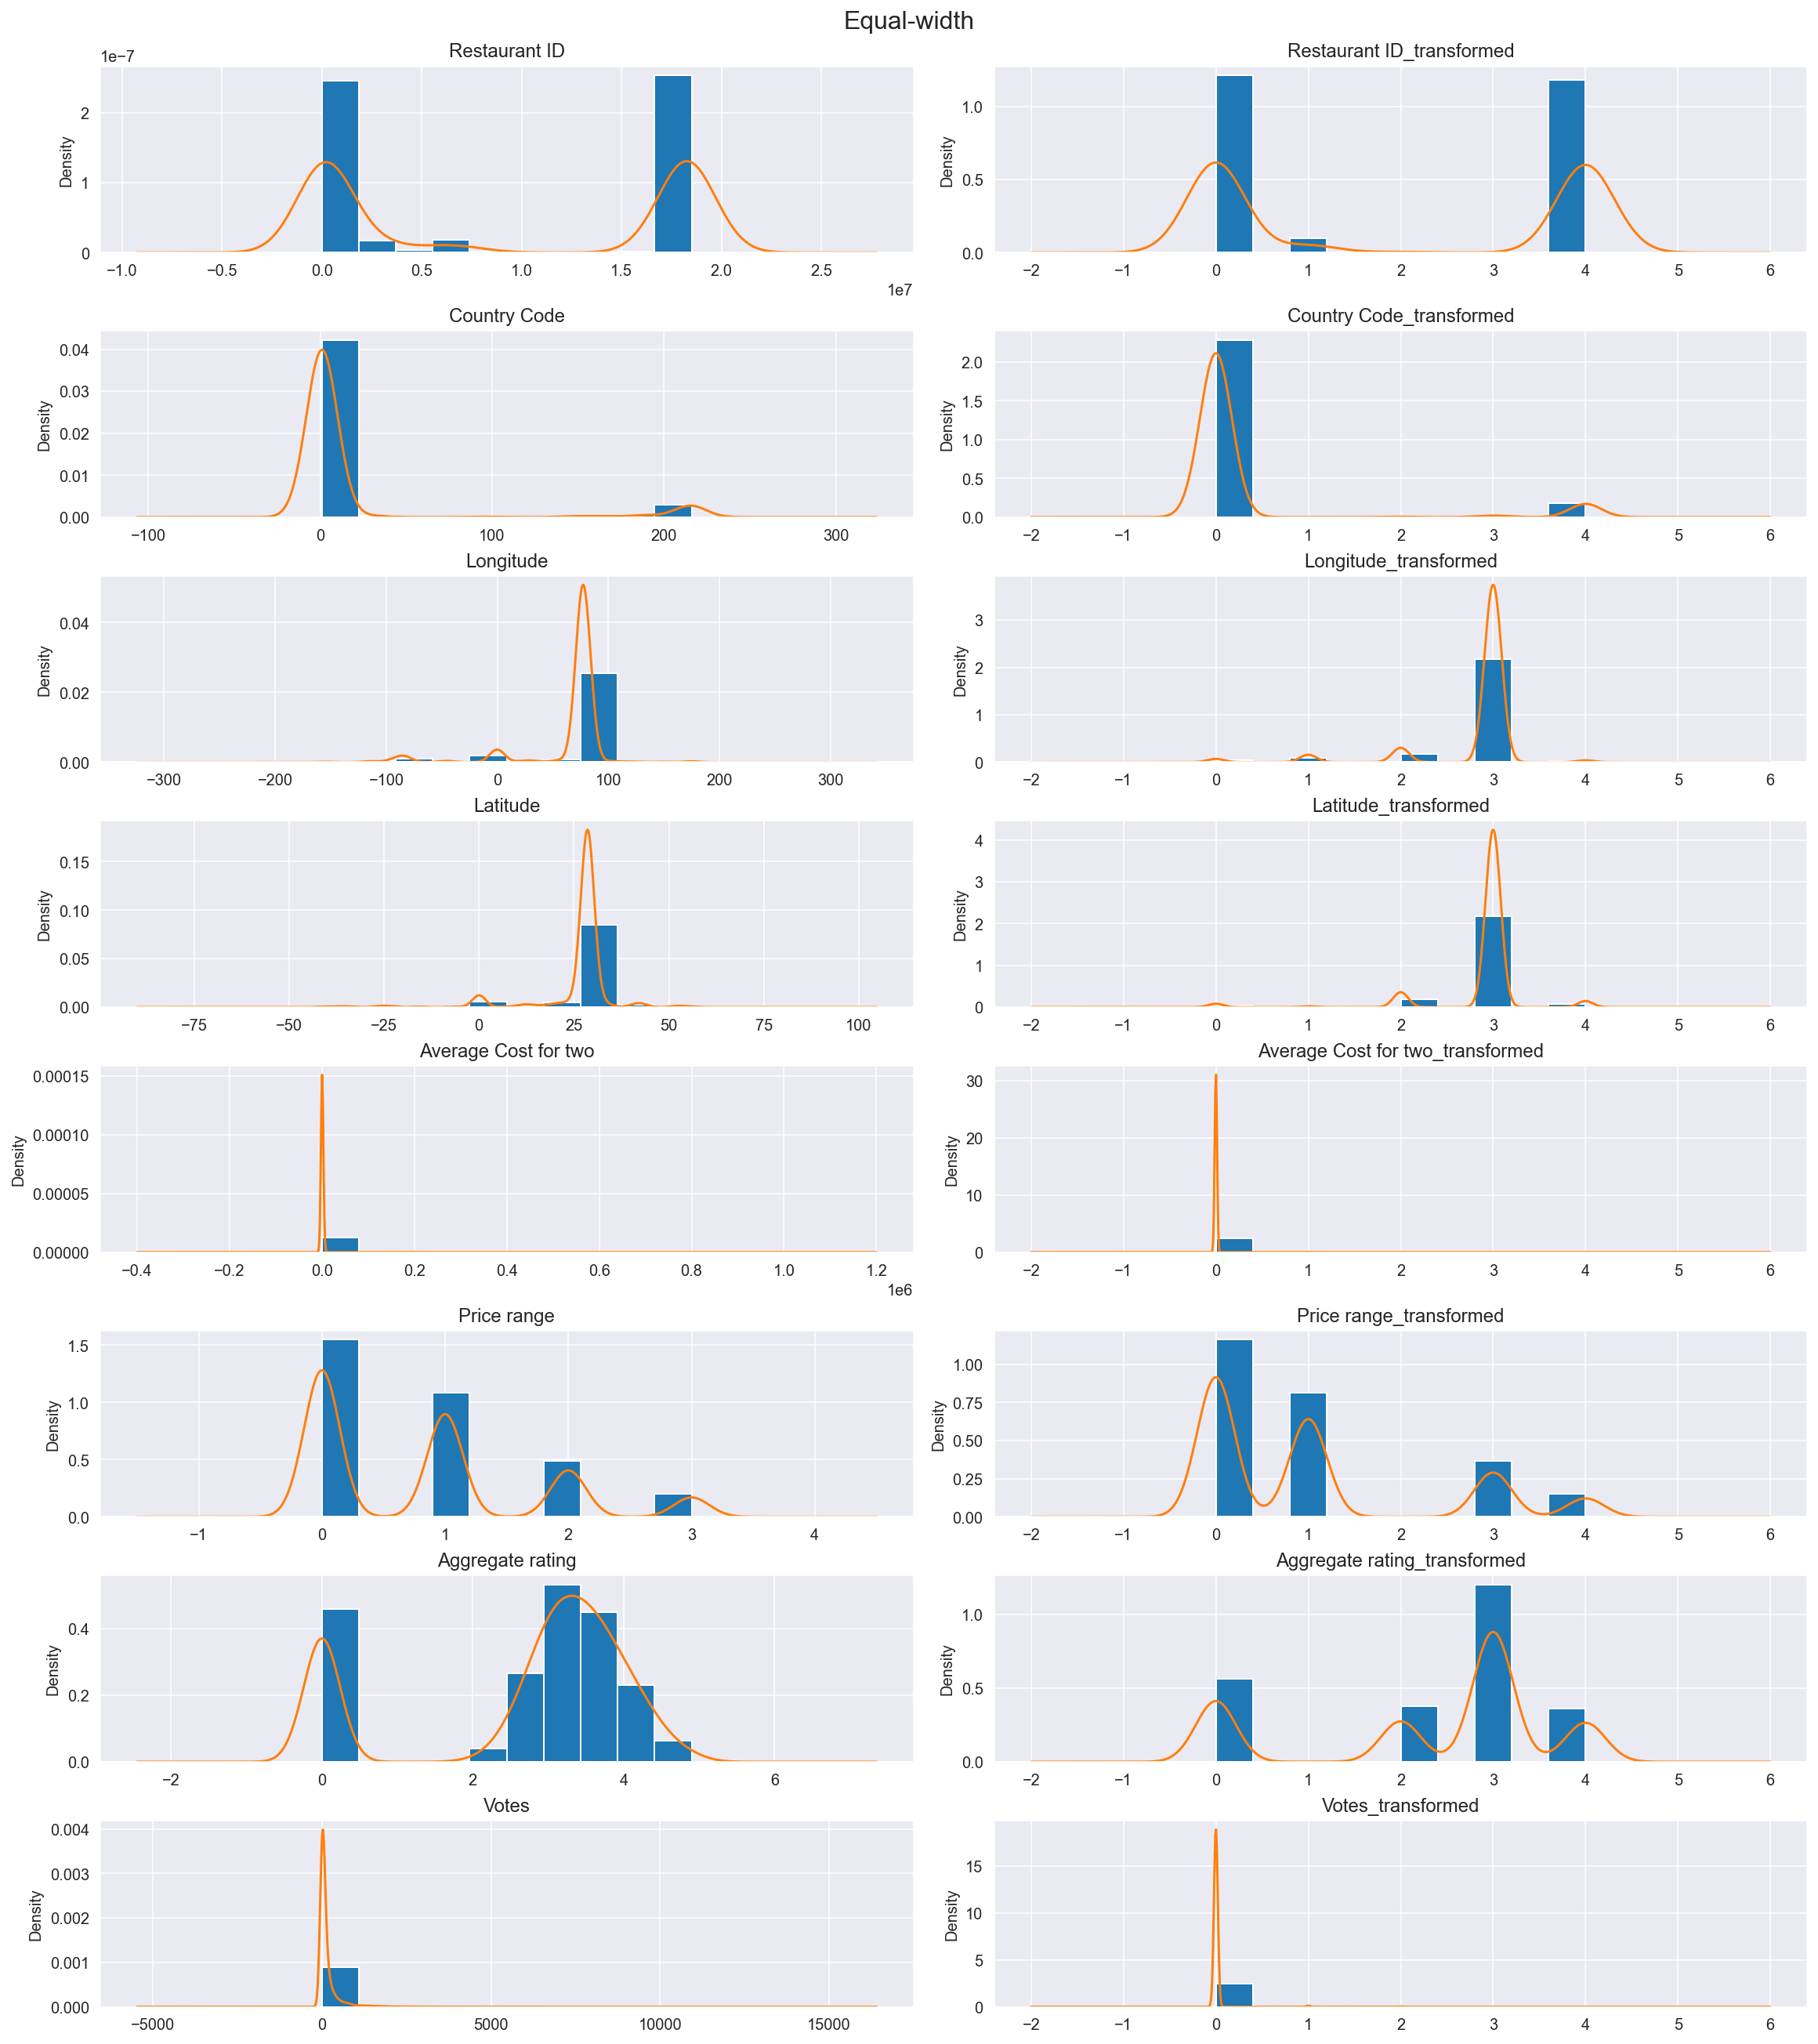

In [53]:
def plot_histograms_density(df, columns, zomato_new_transformed, fig_title):
    fig, axs = plt.subplots(len(columns),2,figsize=(16,18),constrained_layout=True)
    fig.suptitle(fig_title, fontsize=16)
    axs = axs.flatten()
    i = 0 
    for c in columns:
        zomato_edit[c].hist(ax=axs[i], density=True) # normalizes the density
        zomato_edit[c].plot.density(ax=axs[i], title=c)
        zomato_new_transformed[c].hist(ax=axs[i+1], density=True, stacked=True) # normalizes the density
        zomato_new_transformed[c].plot.density(ax=axs[i+1], title=str(c+'_transformed'))
        i+=2

val_cols_names = ['Restaurant ID','Country Code','Longitude','Latitude','Average Cost for two','Price range','Aggregate rating','Votes']

plot_histograms_density(zomato_edit, val_cols_names, zomato_new_d_ew, 'Equal-width')